In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [14]:
csvfiles = [f for f in os.listdir('envs/CartPole') if '.csv' in f]

In [15]:
csvfiles

['bayes.csv', 'boltzman.csv', 'comb.csv', 'count.csv', 'greedy.csv', 'inc.csv']

In [16]:
csvdict = dict()
for k in csvfiles:
    csvdict[k[0:-4]] = pd.read_csv("envs/CartPole/" + k)

In [117]:
def plot_result(df, window = 100, std_coef = 0.2, results_over = 1000, ymin = 0, name = ""):
    s = df.drop("Unnamed: 0", axis = 1)
    rol_mean = np.nan_to_num(s.mean(axis = 0).rolling(window = window).mean())[window:]
    rol_std = np.nan_to_num(s.std(axis = 0).rolling(window = window).mean())[window:]
    plt.figure(figsize = (8, 4))
    index = np.arange(window, len(rol_mean) + window)
    plt.plot(index, rol_mean)
    plt.fill_between(index, rol_mean-std_coef*rol_std, rol_mean+std_coef*rol_std, color='b', alpha=0.1)
    plt.ylim(ymin = ymin)
    plt.ylabel(u"Награда")
    plt.xlabel(u"Номер эпизода")
    plt.title(u"Кривая обучения алгоритма " + name + u". Окно усреднения: " + str(window))
    return max(rol_mean[window:results_over]), rol_mean[window:results_over].mean()

(151.81100000000001, 112.00655777777776)


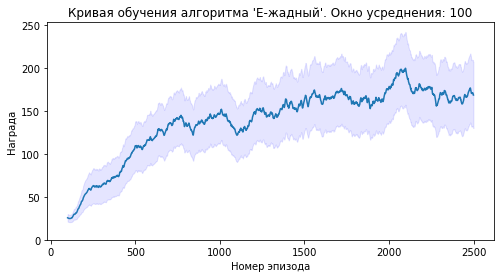

In [153]:
print plot_result(csvdict["greedy"], name = u"'Е-жадный'")
plt.savefig("egreedy_cp.png")

(158.05800000000011, 120.36352444444449)


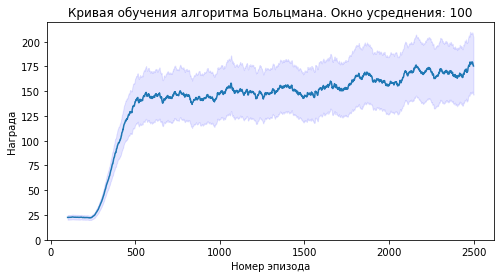

In [154]:
print plot_result(csvdict["boltzman"], name = u"Больцмана")
plt.savefig("boltzman_cp.png")

(196.45300000000043, 121.15521777777791)


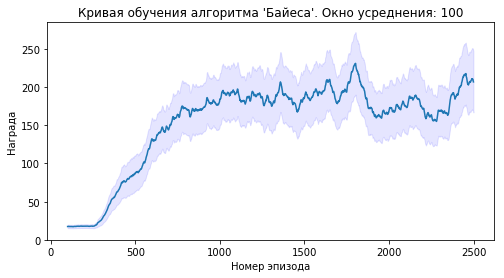

In [155]:
print plot_result(csvdict["bayes"], name = u"'Байеса'")
plt.savefig("bayes_cp.png")

(147.56699999999992, 96.400985555555508)


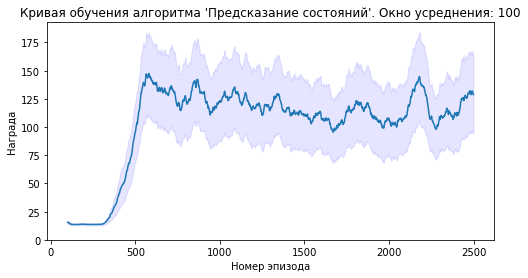

In [156]:
print plot_result(csvdict["inc"], name = u"'Предсказание состояний'")
plt.savefig("incentive_cp.png")

(176.10300000000021, 114.97195888888893)


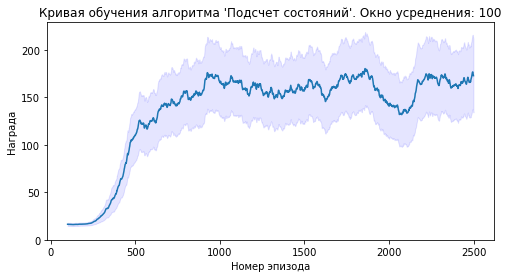

In [157]:
print plot_result(csvdict["count"], name = u"'Подсчет состояний'")
plt.savefig("count_cp.png")

(234.59999999999997, 113.66466999999997)


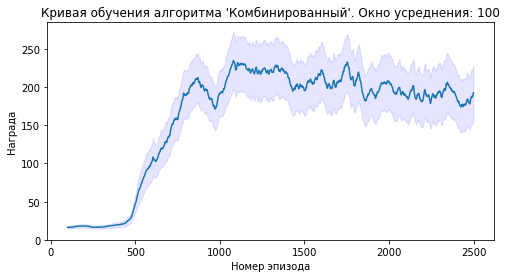

In [158]:
print plot_result(csvdict["comb"], name = u"'Комбинированный'")
plt.savefig("combined_cp.png")

In [150]:
def plot_all_results(csvdict, window = 100, ymin = 0):
    length = csvdict.values()[0].shape[1] - 1
    plt.figure(figsize = (12,6))
    index = np.arange(window, length)
    plt.ylim(ymin = ymin, ymax = 250)
    for key in csvdict:
        s = csvdict[key].drop("Unnamed: 0", axis = 1)
        rol_mean = np.nan_to_num(s.mean(axis = 0).rolling(window = window).mean())[window:]
        plt.plot(index, rol_mean.copy(), label = key)
    plt.ylabel(u"Награда")
    plt.xlabel(u"Номер эпизода")
    plt.title(u"Кривые обучения алгоритмов. Окно усреднения: " + str(window))
    plt.legend()

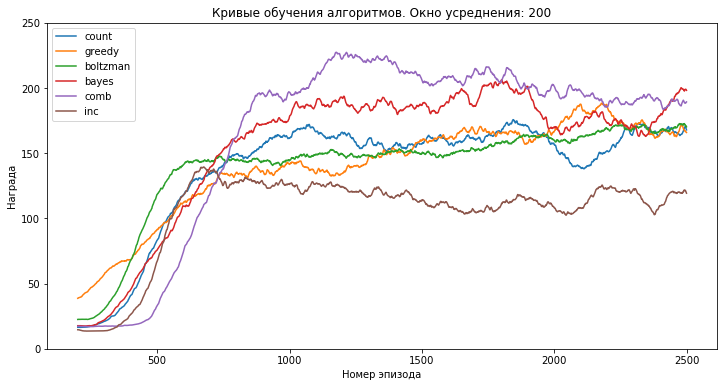

In [152]:
plot_all_results(csvdict, window = 200)
plt.savefig("allalgs_cp.png")